In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations, correlation_ratio, cramers_v

/home/ronald/anaconda3/envs/tp_analisis_de_datos/lib/python3.11/site-packages/dython/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution


In [2]:
def entropy(series):
    probs = series.value_counts(normalize=True)
    probs = probs[probs > 0]
    return -(probs * np.log2(probs)).sum()

In [3]:
# Leemos el csv, es un archivo grande
df = pd.read_csv("data/GEDEvent_v25_1.csv", low_memory=False)
df.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,True,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,True,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


In [4]:
# Eliminamos duplicados y contamos filas
df.drop_duplicates(inplace=True)
print(f"Número de filas: {df.shape[0]}")

Número de filas: 385918


In [5]:
df_resumen = pd.DataFrame({
    'variable_name': df.columns,
    'dtype': df.dtypes.astype(str),
    'no nulos': df.count(),
    'unicos': df.nunique(),
    'unicos_%': (df.nunique()/df.count()*100).round(0).astype(int),
    'nulos': df.isna().sum(),
    'nulos_%': (df.isna().mean() * 100).round(0).astype(int)

})
df_resumen.reset_index(drop=True, inplace=True)
df_resumen

,variable_name,dtype,no nulos,unicos,unicos_%,nulos,nulos_%
0,id,int64,385918,385918,100,0,0
1,relid,object,385918,385918,100,0,0
2,year,int64,385918,36,0,0,0
3,active_year,bool,385918,2,0,0,0
4,code_status,object,385918,1,0,0,0
5,type_of_violence,int64,385918,3,0,0,0
6,conflict_dset_id,int64,385918,1484,0,0,0
7,conflict_new_id,int64,385918,1531,0,0,0
8,conflict_name,object,385918,1529,0,0,0
9,dyad_dset_id,int64,385918,1740,0,0,0


**Procedimiento de selección de variables**

Para eliminar del dataset variables que no aportan información seguimos la siguiente secuecia:
1) Eliminamos los id de los casos individuales: [id] y [relid]
2) Eliminamos las variables que representan una versión alternativa de otra:\
   [year] está implícita en [date_start]\
   [conflict_dset_id], [conflict_new_id] son versiones de [conflict_name]\
   [dyad_dset_id], [dyad_new_id] son versiones de [dyad_name]\
   [side_a_dset_id], [side_a_new_id] y [gwnoa] son versiones de [side_a]\
   [side_b_dset_id], [side_b_new_id] y [gwnob] son versiones de [side_b]\
   [where_description] es un detalle de alta cardinalidad en texto abierto de [where_coordinates] (ej. Kabul international airport -> Kabul airport (Abbey gate entrance))\
   [geom_wkt] es la concatenación de [longitude] y [latitude]\
   [country_id] es otra versión de [country]\
4) Eliminamos variables con un valor único: [code_status]
5) Eliminamos variables con target leakage de [best]:\
   [deaths_a], [deaths_b], [deaths_civilians], [deaths_unknown], [high] y [low] no estarían disponibles en un escenario real y conducen a [best]
6) Eliminamos variables de texto abierto vinculadas con las fuentes del los datos de mortalidad:\
   [source_article], [source_office], [source_date], [source_headline], [source_original]

In [6]:
df.drop(columns=['id', 'relid', 'year', 'conflict_dset_id', 'conflict_new_id', 'dyad_dset_id', 'dyad_new_id', 'side_a_dset_id', 
                 'side_a_new_id', 'gwnoa', 'side_b_dset_id', 'side_b_new_id', 'gwnob', 'where_description', 'geom_wkt', 
                 'country_id', 'code_status', 'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'high', 'low',
                'source_article', 'source_office','source_date', 'source_headline','source_original'], inplace=True)

In [7]:
# Ajustamos las variables con fecha
df['date_start'] = pd.to_datetime(df['date_start'], errors='coerce')
df['date_end'] = pd.to_datetime(df['date_end'], errors='coerce')

In [8]:
# Mapeamos la variable nominal 'type_of_violence' a 1: state-based conflict 2: non-state conflict 3: one-sided violence
df["type_of_violence"] = df["type_of_violence"].map({1: "state-based conflict", 2: "non-state conflict", 3: "one-sided violence"}).astype("category")

In [9]:
# Ajustamos las variables categóricas
categoricas= ['active_year', 'type_of_violence','conflict_name', 'dyad_name', 'side_a', 'side_b', 'where_coordinates', 'adm_1', 'adm_2', 'priogrid_gid', 'country', 'region']
for categorica in categoricas:
    df[categorica] = df[categorica].astype("category")

In [10]:
entropias = df[categoricas].apply(entropy).round()
entropias = entropias.reindex(df.columns)
ent_max = df[categoricas].nunique().apply(lambda k: np.log2(k) if k > 0 else 0)
ent_max = ent_max.reindex(df.columns)

# Hacemos una tabla resumen con las características de cada variable, incluyendo la entropía de las variables 
df_resumen = pd.DataFrame({
    'variable_name': df.columns,
    'dtype': df.dtypes.astype(str),
    'no nulos': df.count(),
    'unicos': df.nunique(),
    'nulos': df.isna().sum(),
    'nulos_%': (df.isna().mean() * 100).round(0).astype(int),
    '% entropia': (entropias/ent_max*100).round()
})
df_resumen.reset_index(drop=True, inplace=True)
df_resumen

,variable_name,dtype,no nulos,unicos,nulos,nulos_%,% entropia
0,active_year,category,385918,2,0,0,0.0
1,type_of_violence,category,385918,3,0,0,63.0
2,conflict_name,category,385918,1529,0,0,57.0
3,dyad_name,category,385918,1771,0,0,65.0
4,side_a,category,385918,966,0,0,61.0
5,side_b,category,385918,959,0,0,50.0
6,number_of_sources,int64,385918,54,0,0,NaN
7,where_prec,int64,385918,7,0,0,NaN
8,where_coordinates,category,385918,54511,0,0,83.0
9,adm_1,category,366371,1682,19547,5,75.0


Analizamos correlaciones entre variables

In [11]:
cols = [
    'active_year', 'type_of_violence', 
    'conflict_name', 'dyad_name', 'side_a', 'side_b', 'number_of_sources',
    #'where_prec', 'where_coordinates', (las saco porque rompen la matriz de covarianza por cardinalidad)
    'adm_1', 'adm_2', 
    #'latitude', 'longitude', 'priogrid_gid', (las saco porque rompen la matriz de covarianza por cardinalidad)
    'country', 'region',
    'event_clarity', 'date_prec', 
    'date_start', 'date_end', 'best'
    ]


In [13]:
result = associations(
    df[cols],
    nominal_columns='auto',
    plot=False,
    nan_strategy='drop_samples'
)

/home/ronald/anaconda3/envs/tp_analisis_de_datos/lib/python3.11/site-packages/dython/nominal.py:632: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  lambda col: col.view(np.int64), axis=0


<Axes: >

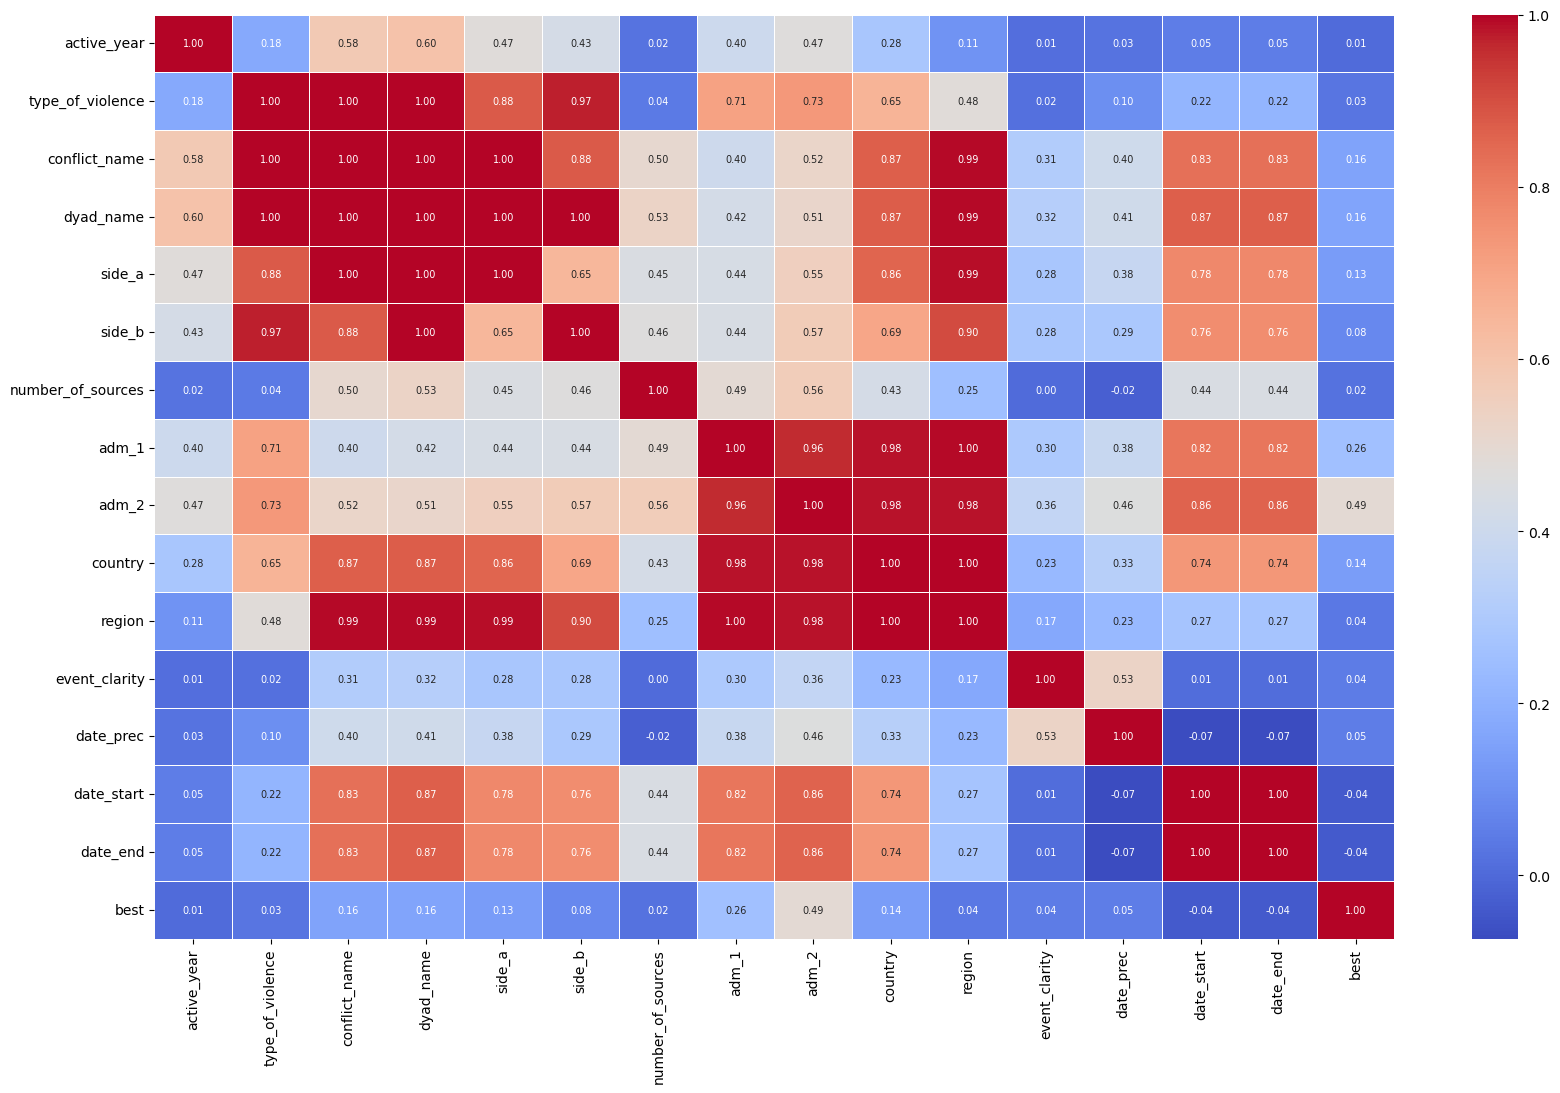

In [14]:
corr_matrix = result['corr']
plt.figure(figsize=(20, 12))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 7},
    linewidths=0.5
)


In [22]:
variables=pd.read_csv("data/variables.csv", encoding="utf-8", sep=';')
variables

,variable_name,description,eliminate,reason_to_eliminate
0,id,Identificador unico del evento,True,Id de la observación
1,relid,Identificador interno del evento (cambia si el...,True,Id de la observación
2,year,Ano del evento,True,Copia a [date_start]
3,active_year,True si el evento pertenece a un conflicto act...,False,NaN
4,code_status,Si el registro est ok (clear) o si hay que ch...,True,Valor único (solo contiene 'clear')
5,type_of_violence,"Tipo de violencia: 1. Conflicto entre estados,...",False,NaN
6,conflict_dset_id,Identificador deprecado,True,Copia a [conflict_name]
7,conflict_new_id,Identificador único del conflicto (usar esto p...,True,Copia a [conflict_name]
8,conflict_name,Nombre del conflicto,False,NaN
9,dyad_dset_id,Identificador deprecado,True,Copia a [dyad_name]


**Procedimiento de selección de variables**

Para eliminar del dataset variables que no aportan información seguimos la siguiente secuecia:
1) Eliminamos los id de los casos individuales: [id] y [relid]
2) Eliminamos las variables que representan una versión alternativa de otra:\
   [year] está implícita en [date_start]\
   [conflict_dset_id], [conflict_new_id] son versiones de [conflict_name]\
   [dyad_dset_id], [dyad_new_id] son versiones de [dyad_name]\
   [side_a_dset_id], [side_a_new_id] y [gwnoa] son versiones de [side_a]\
   [side_b_dset_id], [side_b_new_id] y [gwnob] son versiones de [side_b]\
   [where_description] es un detalle de alta cardinalidad en texto abierto de [where_coordinates] (ej. Kabul international airport -> Kabul airport (Abbey gate entrance))\
   [geom_wkt] es la concatenación de [longitude] y [latitude]\
   [country_id] es otra versión de [country]\
4) Eliminamos variables con un valor único: [code_status]
5) Eliminamos variables con target leakage de [best]:\
   [deaths_a], [deaths_b], [deaths_civilians], [deaths_unknown], [high] y [low] no estarían disponibles en un escenario real y conducen a [best]
6) Eliminamos variables de texto abierto vinculadas con las fuentes del los datos de mortalidad:\
   [source_article], [source_office], [source_date], [source_headline], [source_original]